In [31]:

import CommonMotifProb
import math
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline

Code to plot codon accessibility as satellite plots, thereby allowing direct comparison of accessibility between two codons or the same codon using different mutations rates.

Codon accessibility data should be supplied as csvs with two columns "codon" and "probability".

This is also calucalted using my notebook ...

In [6]:
CodonAccess1="codonProbsATA-plotData.csv"
CodonAccess2="codonProbsATA-plotData-Rate2-NoBias.csv"

In [7]:
def circleAratio(ratio,maxA):
    return np.sqrt((ratio*maxA)/np.pi)

In [8]:
def circleCoords(radius,angle,OriX=0,OriY=0):
    x = radius*np.cos(angle) + OriX
    y = radius*np.sin(angle) + OriY
    
    return (x,y)

In [10]:
dataATARate1=pd.read_csv(CodonAccess1,index_col=0)

In [11]:
dataATARate2=pd.read_csv(CodonAccess2,index_col=0)

In [12]:
dataATA1={}
for i,row in dataATARate1.iterrows():
    dataATA1[CommonMotifProb.translateRNA(row.codon)]=0.0
for i,row in dataATARate1.iterrows():
    dataATA1[CommonMotifProb.translateRNA(row.codon)]+=row.probability
    
dataATA1DF=pd.Series(dataATA1,name='Prob')

dataATA1DF.index.name='AA'
dataATA1DF=dataATA1DF.reset_index()
mindataATA1=1
for i in dataATA1:
    if dataATA1[i]<mindataATA1:
        mindataATA1=dataATA1[i]

In [13]:
dataATA2={}
for i,row in dataATARate2.iterrows():
    dataATA2[CommonMotifProb.translateRNA(row.codon)]=0.0
for i,row in dataATARate2.iterrows():
    dataATA2[CommonMotifProb.translateRNA(row.codon)]+=row.probability
    
dataATA2DF=pd.Series(dataATA2,name='Prob')

dataATA2DF.index.name='AA'
dataATA2DF=dataATA2DF.reset_index()
mindataATA2=1
for i in dataATA2:
    if dataATA2[i]<mindataATA2:
        mindataATA2=dataATA2[i]

In [10]:
data=pd.read_csv("codonProbsACC-plotData.csv",index_col=0)

In [14]:
dataATCRate1=pd.read_csv("codonProbsATC-plotData.csv",index_col=0)

In [15]:
dataATCRate2=pd.read_csv("codonProbsATC-plotData-Rate2-NoBias.csv",index_col=0)

In [43]:
dataATC1DF.to_csv("ATCAAaccessibility_values_flubias.csv")

In [16]:
dataATC1={}
for i,row in dataATCRate1.iterrows():
    dataATC1[CommonMotifProb.translateRNA(row.codon)]=0.0
for i,row in dataATCRate1.iterrows():
    dataATC1[CommonMotifProb.translateRNA(row.codon)]+=row.probability

dataATC1DF=pd.Series(dataATC1,name='Prob')

dataATC1DF.index.name='AA'
dataATC1DF=dataATC1DF.reset_index()
mindataATC1=1
for i in dataATC1:
    if dataATC1[i]<mindataATC1:
        mindataATC1=dataATC1[i]

In [17]:
ratioDataATCATA={}
for index,i in dataATC1DF.iterrows():
    b=dataATA2DF[dataATA2DF['AA']==i.AA]

    for j,a in b.iterrows():
        continue
    ratioDataATCATA[i.AA]=a.Prob/i.Prob


In [18]:
#Ratio ATC(nobias)/ATA(NoBias)
ratioDataATCATA2={}
for index,i in dataATA2DF.iterrows():
    b=dataATC2DF[dataATC2DF['AA']==i.AA]

    for j,a in b.iterrows():
        continue
    ratioDataATCATA2[i.AA]=a.Prob/i.Prob


NameError: name 'dataATC2DF' is not defined

In [19]:
ratioDataATA1ATA2={}
for index,i in dataATA1DF.iterrows():
    b=dataATA2DF[dataATA2DF['AA']==i.AA]

    for j,a in b.iterrows():
        continue
    ratioDataATA1ATA2[i.AA]=i.Prob/a.Prob

In [28]:
#ratioDataATAATC

ratioDataDF=pd.Series(ratioDataATCATA,name='Ratio')

ratioDataDF.index.name='AA'
ratioDataDF=ratioDataDF.reset_index()

In [20]:
dataATC2={}
for i,row in dataATCRate2.iterrows():
    dataATC2[CommonMotifProb.translateRNA(row.codon)]=0.0
for i,row in dataATCRate2.iterrows():
    dataATC2[CommonMotifProb.translateRNA(row.codon)]+=row.probability
    
dataATC2DF=pd.Series(dataATC2,name='Prob')

dataATC2DF.index.name='AA'
dataATC2DF=dataATC2DF.reset_index()
mindataATC2=1
for i in dataATC2:
    if dataATC2[i]<mindataATC2:
        mindataATC2=dataATC2[i]


In [85]:
math.log(1000,1.1)

72.47657378429035

<function matplotlib.pyplot.show(close=None, block=None)>

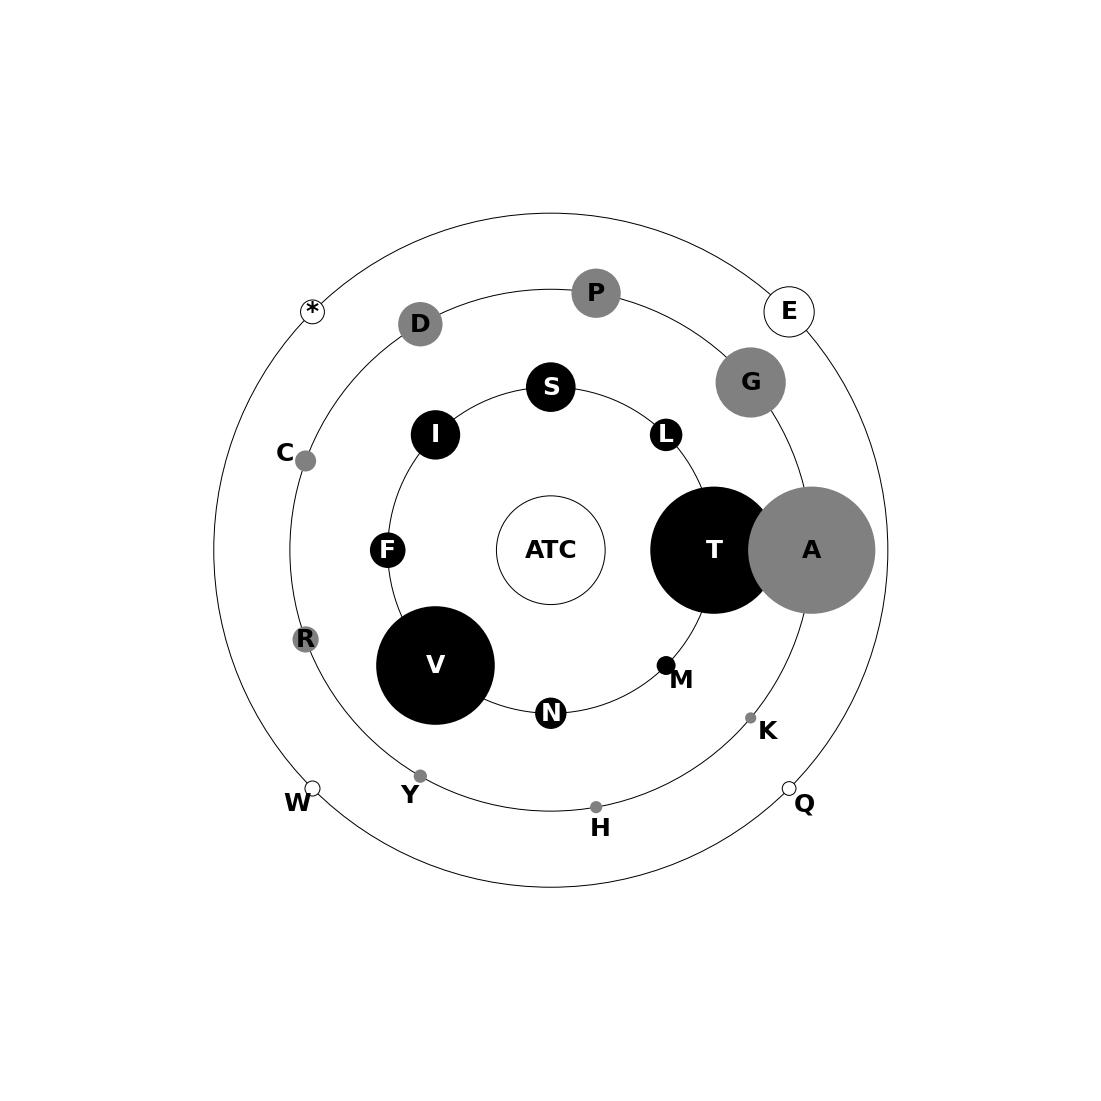

In [23]:
#compare ATC and ATA
from matplotlib.patches import Circle
font=22
weight='semibold'
maxR=0.004
maxA=maxR**2*np.pi
edgecolor=None
facecolor='black'

fig,ax= plt.subplots(1, 1, figsize=(20,20))
ax.set_xlim(-10000,10000)
ax.set_ylim(-10000,10000)

c = Circle((0,0), radius=1000,
    edgecolor="black", facecolor="white")     

ax.add_patch(c)

#c = Circle((0,0), radius=1000,
#    edgecolor="black", facecolor="white",alpha=0.5)     

#ax.add_patch(c)
ax.annotate('ATC', xy=(0,0), fontsize=25, ha="center",va="center",color="black",weight='bold')
#ax.annotate('ATA', xy=(0,-700), fontsize=15, ha="center",va="center",color="black")
c = Circle((0,0), radius=3000,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)
c = Circle((0,0), radius=4800,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)
c = Circle((0,0), radius=6200,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)

counter=0
circle1=dataATC1DF[dataATC1DF['Prob']>10**-7]
circle2=dataATC1DF[(dataATC1DF['Prob']<10**-7) & (dataATC1DF['Prob']>10**-10)]
circle3=dataATC1DF[(dataATC1DF['Prob']<10**-10)]
points1=len(circle1)
points2=len(circle2)
points3=len(circle3)
for index,i in circle1.iterrows():
    
    if i.AA=='L':
        a=circle1[circle1['AA']=='V']
        for m, i in a.iterrows():
            continue

    elif i.AA=='V':
        a=circle1[circle1['AA']=='L']
        for m, i in a.iterrows():
            continue
        

    angleincre=(2*np.pi)/points1

    dia=3000
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio(i.Prob/mindataATC1,maxA)
    #print rad
    edgecolor=None
    facecolor='black'
    
    coords=circleCoords(dia,angleincre*counter)
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200:
        fontsize=25
    else:
        fontsize=25
    labelcoords=circleCoords(dia,angleincre*counter)


    
    if rad<250 and rad>200:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))
        color='white'
    elif rad<200:
        fontsize=25
        labelcoords=circleCoords(dia+400,angleincre*(counter))
        color='black'
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))
        color='white'

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color=color,weight = 'bold')    

    counter+=1
    
counter=0    
for index,i in circle2.iterrows():

    angleincre=(2*np.pi)/points2

    dia=4800
    
    coords=circleCoords(dia,angleincre*counter)
    
    if i.AA=='A':
        rad=circleAratio((i.Prob/mindataATC1)*5000,maxA)
    else:
        rad=circleAratio((i.Prob/mindataATC1)*10000,maxA)
    #print rad
    edgecolor=None
    facecolor='grey'
    
    coords=circleCoords(dia,angleincre*counter)
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200:
        fontsize=25
    else:
        fontsize=25
    labelcoords=circleCoords(dia,angleincre*counter)


    if rad<250 and rad>200:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))
    elif rad<200:
        fontsize=25
        labelcoords=circleCoords(dia+400,angleincre*(counter))
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color="black",weight = 'bold')    
    

    counter+=1
    
counter=0    
for index,i in circle3.iterrows():

    angleincre=(2*np.pi)/points3

    dia=6200
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio((i.Prob/mindataATC1)*1000000000,maxA)

    #print rad
    edgecolor='black'
    facecolor='white'
    
    coords=circleCoords(dia,angleincre*(counter+0.5))
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200 and rad>150:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter+0.5))
    elif rad<150:
        fontsize=25
        labelcoords=circleCoords(dia+400,angleincre*(counter+0.5))
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter+0.5))

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color="black",weight = 'bold')
    
    

    counter+=1
    
counter=0    
    
#for i in dataATA1:
#    #print (dataAA[i]/mindataAA)*maxA
#    angleincre=(2*np.pi)/points1

#    dia=8000
    
#    coords=circleCoords(dia,angleincre*counter)

#    rad=circleAratio(dataATA1[i]/mindataATC1,maxA)
    #print i, rad
#    if rad<20 and rad > 0.1:
#        rad=rad*60
#        facecolor='grey'#
#        edgecolor='None'
#    elif rad<0.1:
#        rad=rad*10**4
#        print rad
#        facecolor='maroon'
#        edgecolor='None'
#    else:
#        edgecolor=None
#        facecolor='black'
#    c = Circle(coords, radius=rad,
#    edgecolor=edgecolor, facecolor=facecolor)     
#    ax.add_patch(c)
    #labelcoords=circleCoords(dia+rad+200,angleincre*counter)
    #ax.annotate(i, xy=labelcoords, fontsize=15, ha="center",va="center",color="black")
    
#    labelcoordsratio=circleCoords(dia+1600,angleincre*counter)
    
#    ratio=dataATC1[i]/dataATA1[i]
    
#    if ratio>100:
        
#        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
        
#    elif ratio<0.01:
#        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
#    elif ratio==1.0:
#        ax.annotate(ratio, xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
#    else:
#        ax.annotate('{:.2}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
        
#    counter+=1  


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])


ax.set_aspect('equal')

    
plt.show

In [56]:
fig.savefig("SubstProfile-ATC-FluBias-MS1New.pdf",format='pdf')

<function matplotlib.pyplot.show(close=None, block=None)>

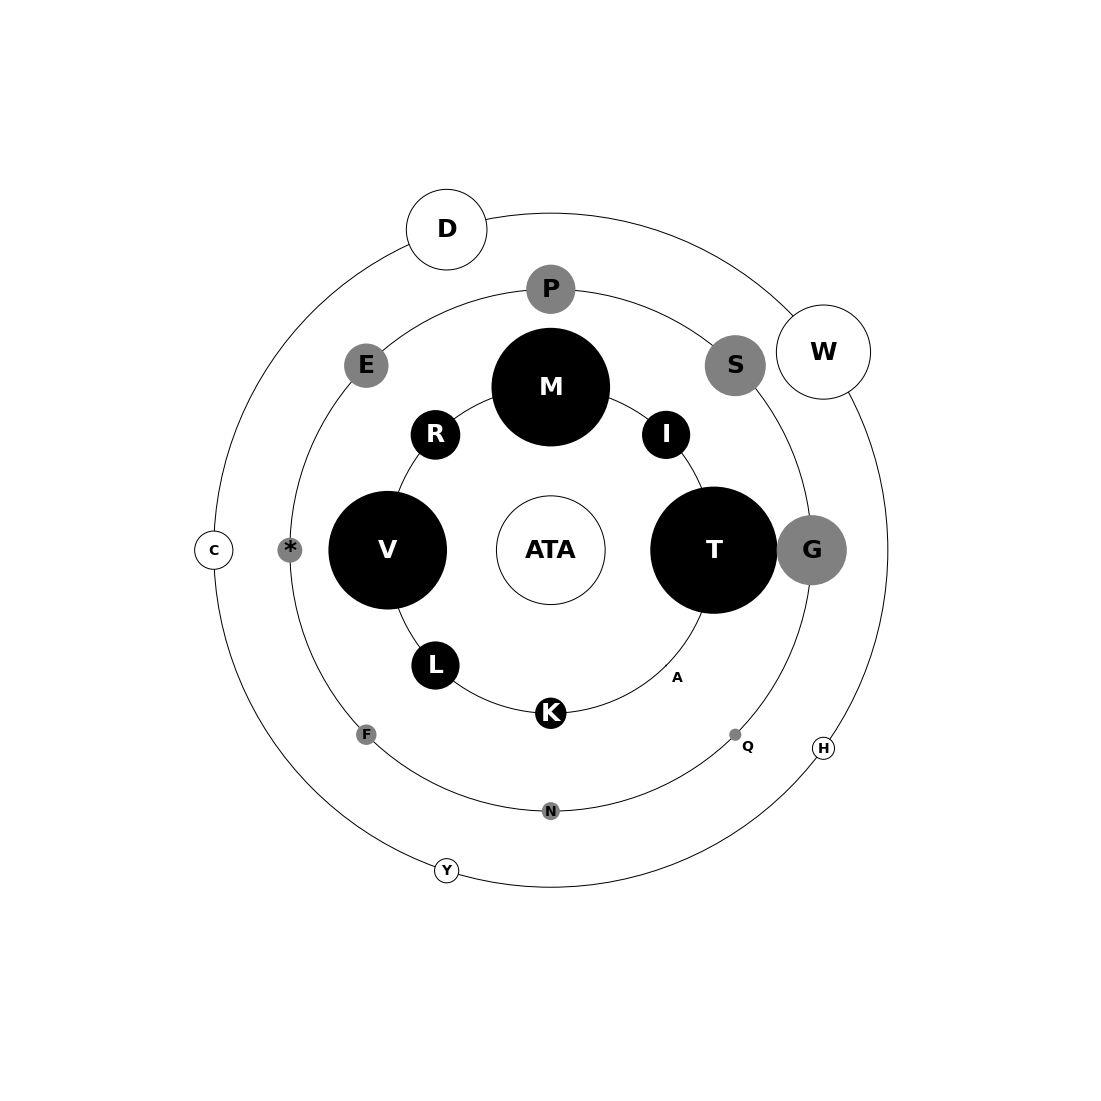

In [24]:
#compare ATC and ATA
from matplotlib.patches import Circle
font=22
weight='semibold'
maxR=0.004
maxA=maxR**2*np.pi
edgecolor=None
facecolor='black'

fig,ax= plt.subplots(1, 1, figsize=(20,20))
ax.set_xlim(-10000,10000)
ax.set_ylim(-10000,10000)

c = Circle((0,0), radius=1000,
    edgecolor="black", facecolor="white")     

ax.add_patch(c)

#c = Circle((0,0), radius=1000,
#    edgecolor="black", facecolor="white",alpha=0.5)     

#ax.add_patch(c)
ax.annotate('ATA', xy=(0,0), fontsize=25, ha="center",va="center",color="black",weight='bold')
#ax.annotate('ATA', xy=(0,-700), fontsize=15, ha="center",va="center",color="black")
c = Circle((0,0), radius=3000,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)
c = Circle((0,0), radius=4800,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)
c = Circle((0,0), radius=6200,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)

counter=0
circle1=dataATA1DF[dataATA1DF['Prob']>10**-8]
circle2=dataATA1DF[(dataATA1DF['Prob']<10**-8) & (dataATA1DF['Prob']>10**-10)]
circle3=dataATA1DF[(dataATA1DF['Prob']<10**-10)]
points1=len(circle1)
points2=len(circle2)
points3=len(circle3)
for index,i in circle1.iterrows():
    
    if i.AA=='I':
        a=circle1[circle1['AA']=='V']
        for m, i in a.iterrows():
            continue

    elif i.AA=='V':
        a=circle1[circle1['AA']=='I']
        for m, i in a.iterrows():
            continue
        

    angleincre=(2*np.pi)/points1

    dia=3000
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio(i.Prob/mindataATC1,maxA)
    #print rad
    edgecolor=None
    facecolor='black'
    
    coords=circleCoords(dia,angleincre*counter)
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200:
        fontsize=14
    else:
        fontsize=25
    labelcoords=circleCoords(dia,angleincre*counter)


    
    if rad<200 and rad>150:
        fontsize=14
        labelcoords=circleCoords(dia,angleincre*(counter))
        color='white'
    elif rad<150:
        fontsize=14
        labelcoords=circleCoords(dia+300,angleincre*(counter))
        color='black'
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))
        color='white'

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color=color,weight = 'bold')    

    counter+=1
    
counter=0    
for index,i in circle2.iterrows():

    angleincre=(2*np.pi)/points2

    dia=4800
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio((i.Prob/mindataATC1)*10000,maxA)
    #print rad
    edgecolor=None
    facecolor='grey'
    
    coords=circleCoords(dia,angleincre*counter)
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200:
        fontsize=14
    else:
        fontsize=25
    labelcoords=circleCoords(dia,angleincre*counter)


    if rad<200 and rad>150:
        fontsize=14
        labelcoords=circleCoords(dia,angleincre*(counter))
    elif rad<150:
        fontsize=14
        labelcoords=circleCoords(dia+300,angleincre*(counter))
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color="black",weight = 'bold')    
    

    counter+=1
    
counter=0    
for index,i in circle3.iterrows():

    angleincre=(2*np.pi)/points3

    dia=6200
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio((i.Prob/mindataATC1)*1000000000,maxA)

    #print rad
    edgecolor='black'
    facecolor='white'
    
    coords=circleCoords(dia,angleincre*(counter+0.5))
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<600 and rad>180:
        fontsize=14
        labelcoords=circleCoords(dia,angleincre*(counter+0.5))
    elif rad<180:
        fontsize=14
        labelcoords=circleCoords(dia+300,angleincre*(counter+0.5))
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter+0.5))

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color="black",weight = 'bold')
    
    

    counter+=1
    
counter=0    
    
#for i in dataATA1:
#    #print (dataAA[i]/mindataAA)*maxA
#    angleincre=(2*np.pi)/points1

#    dia=8000
    
#    coords=circleCoords(dia,angleincre*counter)

#    rad=circleAratio(dataATA1[i]/mindataATC1,maxA)
    #print i, rad
#    if rad<20 and rad > 0.1:
#        rad=rad*60
#        facecolor='grey'#
#        edgecolor='None'
#    elif rad<0.1:
#        rad=rad*10**4
#        print rad
#        facecolor='maroon'
#        edgecolor='None'
#    else:
#        edgecolor=None
#        facecolor='black'
#    c = Circle(coords, radius=rad,
#    edgecolor=edgecolor, facecolor=facecolor)     
#    ax.add_patch(c)
    #labelcoords=circleCoords(dia+rad+200,angleincre*counter)
    #ax.annotate(i, xy=labelcoords, fontsize=15, ha="center",va="center",color="black")
    
#    labelcoordsratio=circleCoords(dia+1600,angleincre*counter)
    
#    ratio=dataATC1[i]/dataATA1[i]
    
#    if ratio>100:
        
#        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
        
#    elif ratio<0.01:
#        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
#    elif ratio==1.0:
#        ax.annotate(ratio, xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
#    else:
#        ax.annotate('{:.2}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
        
#    counter+=1  


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])


ax.set_aspect('equal')

    
plt.show

<function matplotlib.pyplot.show>

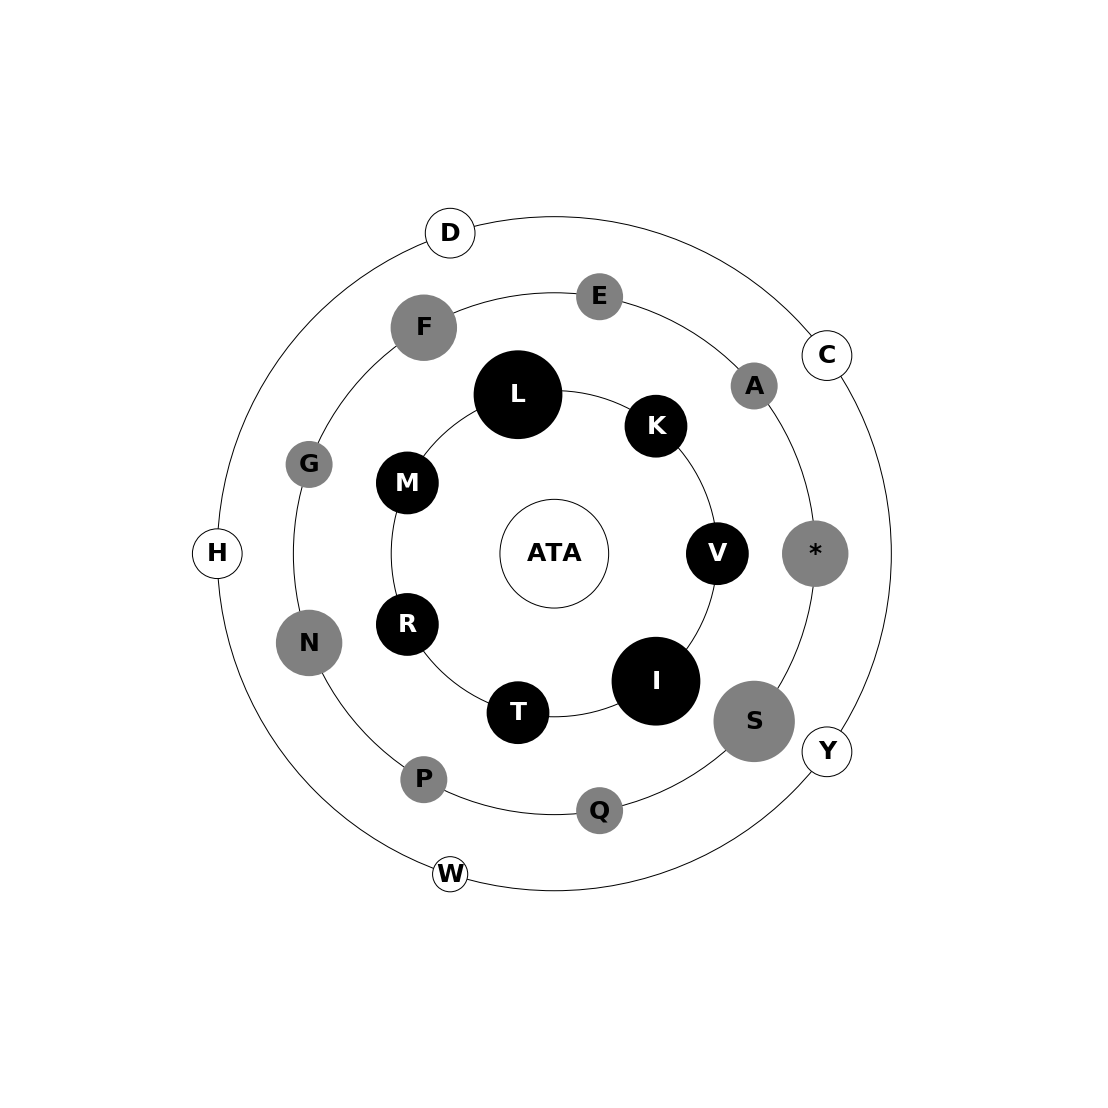

In [21]:
#compare ATC and ATA
from matplotlib.patches import Circle
font=22
weight='semibold'
maxR=0.004
maxA=maxR**2*np.pi
edgecolor=None
facecolor='black'

fig,ax= plt.subplots(1, 1, figsize=(20,20))
ax.set_xlim(-10000,10000)
ax.set_ylim(-10000,10000)

c = Circle((0,0), radius=1000,
    edgecolor="black", facecolor="white")     

ax.add_patch(c)

#c = Circle((0,0), radius=1000,
#    edgecolor="black", facecolor="white",alpha=0.5)     

#ax.add_patch(c)
ax.annotate('ATA', xy=(0,0), fontsize=25, ha="center",va="center",color="black",weight='bold')
#ax.annotate('ATA', xy=(0,-700), fontsize=15, ha="center",va="center",color="black")
c = Circle((0,0), radius=3000,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)
c = Circle((0,0), radius=4800,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)
c = Circle((0,0), radius=6200,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)

counter=0
circle1=dataATA2DF[dataATA2DF['Prob']>10**-8]
circle2=dataATA2DF[(dataATA2DF['Prob']<10**-8) & (dataATA2DF['Prob']>10**-10)]
circle3=dataATA2DF[(dataATA2DF['Prob']<10**-10)]
points1=len(circle1)
points2=len(circle2)
points3=len(circle3)
for index,i in circle1.iterrows():
    
    if i.AA=='I':
        a=circle1[circle1['AA']=='V']
        for m, i in a.iterrows():
            continue

    elif i.AA=='V':
        a=circle1[circle1['AA']=='I']
        for m, i in a.iterrows():
            continue
        

    angleincre=(2*np.pi)/points1

    dia=3000
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio(i.Prob/mindataATC1,maxA)
    #print rad
    edgecolor=None
    facecolor='black'
    
    coords=circleCoords(dia,angleincre*counter)
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200:
        fontsize=25
    else:
        fontsize=25
    labelcoords=circleCoords(dia,angleincre*counter)


    
    if rad<200 and rad>150:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))
        color='white'
    elif rad<150:
        fontsize=25
        labelcoords=circleCoords(dia+300,angleincre*(counter))
        color='black'
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))
        color='white'

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color=color,weight = 'bold')    

    counter+=1
    
counter=0    
for index,i in circle2.iterrows():

    angleincre=(2*np.pi)/points2

    dia=4800
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio((i.Prob/mindataATC1)*10000,maxA)
    #print rad
    edgecolor=None
    facecolor='grey'
    
    coords=circleCoords(dia,angleincre*counter)
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200:
        fontsize=25
    else:
        fontsize=25
    labelcoords=circleCoords(dia,angleincre*counter)



    if rad<200:
        fontsize=25
        labelcoords=circleCoords(dia+400,angleincre*(counter))
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color="black",weight = 'bold')    
    

    counter+=1
    
counter=0    
for index,i in circle3.iterrows():

    angleincre=(2*np.pi)/points3

    dia=6200
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio((i.Prob/mindataATC1)*100000000,maxA)

    #print rad
    edgecolor='black'
    facecolor='white'
    
    coords=circleCoords(dia,angleincre*(counter+0.5))
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<600 and rad>130:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter+0.5))
    elif rad<130:
        fontsize=25
        labelcoords=circleCoords(dia+400,angleincre*(counter+0.5))
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter+0.5))

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color="black",weight = 'bold')
    
    

    counter+=1
    
counter=0    
    
#for i in dataATA1:
#    #print (dataAA[i]/mindataAA)*maxA
#    angleincre=(2*np.pi)/points1

#    dia=8000
    
#    coords=circleCoords(dia,angleincre*counter)

#    rad=circleAratio(dataATA1[i]/mindataATC1,maxA)
    #print i, rad
#    if rad<20 and rad > 0.1:
#        rad=rad*60
#        facecolor='grey'#
#        edgecolor='None'
#    elif rad<0.1:
#        rad=rad*10**4
#        print rad
#        facecolor='maroon'
#        edgecolor='None'
#    else:
#        edgecolor=None
#        facecolor='black'
#    c = Circle(coords, radius=rad,
#    edgecolor=edgecolor, facecolor=facecolor)     
#    ax.add_patch(c)
    #labelcoords=circleCoords(dia+rad+200,angleincre*counter)
    #ax.annotate(i, xy=labelcoords, fontsize=15, ha="center",va="center",color="black")
    
#    labelcoordsratio=circleCoords(dia+1600,angleincre*counter)
    
#    ratio=dataATC1[i]/dataATA1[i]
    
#    if ratio>100:
        
#        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
        
#    elif ratio<0.01:
#        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
#    elif ratio==1.0:
#        ax.annotate(ratio, xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
#    else:
#        ax.annotate('{:.2}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
        
#    counter+=1  


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])


ax.set_aspect('equal')

    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

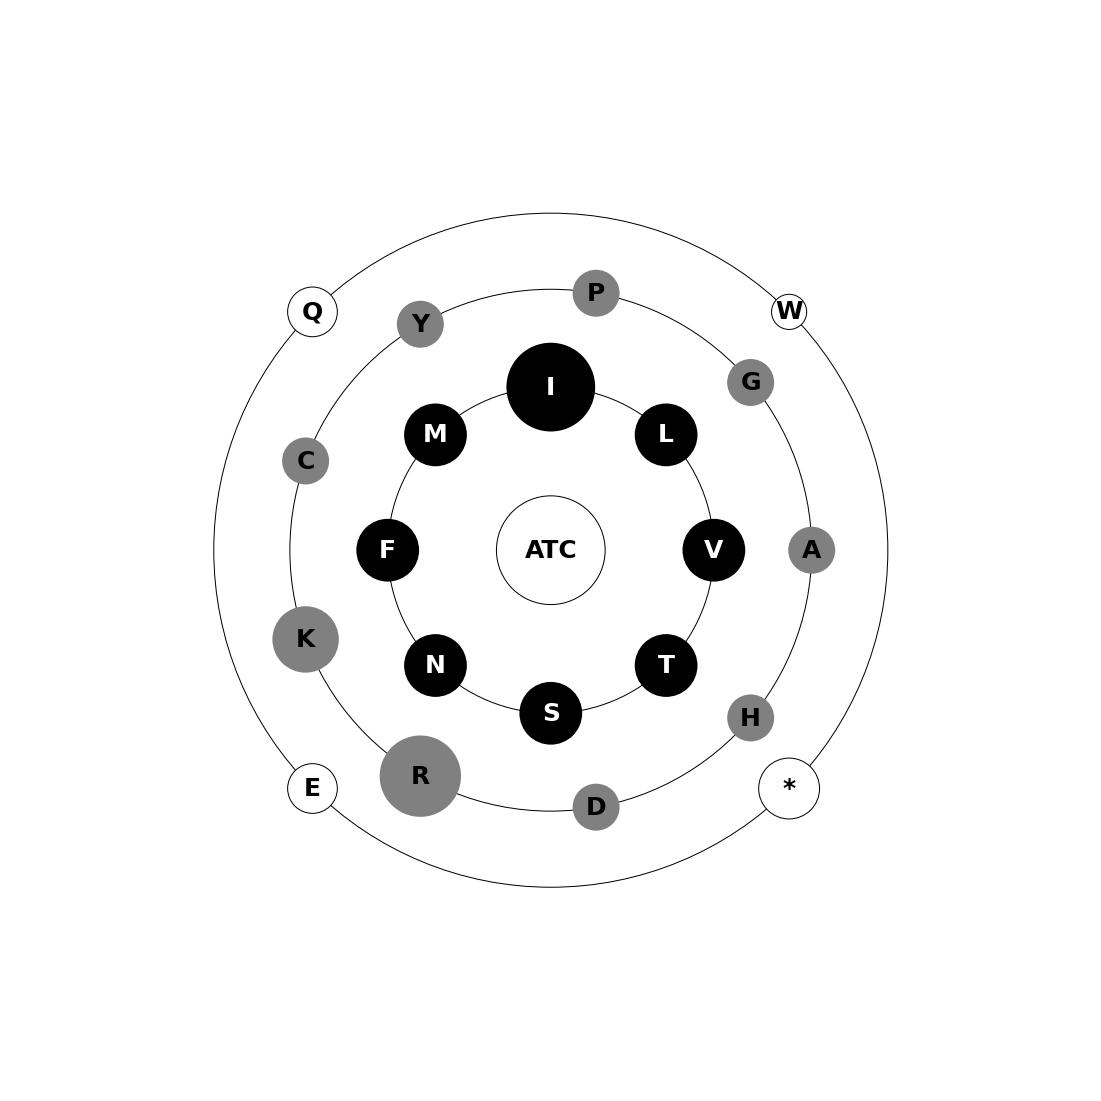

In [25]:
#compare ATC no bias
from matplotlib.patches import Circle
font=22
weight='semibold'
maxR=0.004
maxA=maxR**2*np.pi
edgecolor=None
facecolor='black'

fig,ax= plt.subplots(1, 1, figsize=(20,20))
ax.set_xlim(-10000,10000)
ax.set_ylim(-10000,10000)

c = Circle((0,0), radius=1000,
    edgecolor="black", facecolor="white")     

ax.add_patch(c)

#c = Circle((0,0), radius=1000,
#    edgecolor="black", facecolor="white",alpha=0.5)     

#ax.add_patch(c)
ax.annotate('ATC', xy=(0,0), fontsize=25, ha="center",va="center",color="black",weight='bold')
#ax.annotate('ATA', xy=(0,-700), fontsize=15, ha="center",va="center",color="black")
c = Circle((0,0), radius=3000,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)
c = Circle((0,0), radius=4800,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)
c = Circle((0,0), radius=6200,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)

counter=0
circle1=dataATC2DF[dataATC2DF['Prob']>10**-8]
circle2=dataATC2DF[(dataATC2DF['Prob']<10**-8) & (dataATC2DF['Prob']>10**-10)]
circle3=dataATC2DF[(dataATC2DF['Prob']<10**-10)]
points1=len(circle1)
points2=len(circle2)
points3=len(circle3)
for index,i in circle1.iterrows():
    
    if i.AA=='I':
        a=circle1[circle1['AA']=='V']
        for m, i in a.iterrows():
            continue

    elif i.AA=='V':
        a=circle1[circle1['AA']=='I']
        for m, i in a.iterrows():
            continue
        

    angleincre=(2*np.pi)/points1

    dia=3000
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio(i.Prob/mindataATC1,maxA)
    #print rad
    edgecolor=None
    facecolor='black'
    
    coords=circleCoords(dia,angleincre*counter)
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200:
        fontsize=25
    else:
        fontsize=25
    labelcoords=circleCoords(dia,angleincre*counter)


    
    if rad<200 and rad>150:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))
        color='white'
    elif rad<150:
        fontsize=25
        labelcoords=circleCoords(dia+300,angleincre*(counter))
        color='black'
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))
        color='white'

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color=color,weight = 'bold')    

    counter+=1
    
counter=0    
for index,i in circle2.iterrows():

    angleincre=(2*np.pi)/points2

    dia=4800
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio((i.Prob/mindataATC1)*10000,maxA)
    #print rad
    edgecolor=None
    facecolor='grey'
    
    coords=circleCoords(dia,angleincre*counter)
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200:
        fontsize=25
    else:
        fontsize=25
    labelcoords=circleCoords(dia,angleincre*counter)



    if rad<200:
        fontsize=25
        labelcoords=circleCoords(dia+400,angleincre*(counter))
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color="black",weight = 'bold')    
    

    counter+=1
    
counter=0    
for index,i in circle3.iterrows():

    angleincre=(2*np.pi)/points3

    dia=6200
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio((i.Prob/mindataATC1)*100000000,maxA)

    #print rad
    edgecolor='black'
    facecolor='white'
    
    coords=circleCoords(dia,angleincre*(counter+0.5))
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<600 and rad>130:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter+0.5))
    elif rad<130:
        fontsize=25
        labelcoords=circleCoords(dia+400,angleincre*(counter+0.5))
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter+0.5))

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color="black",weight = 'bold')
    
    

    counter+=1
    
counter=0    
    
#for i in dataATA1:
#    #print (dataAA[i]/mindataAA)*maxA
#    angleincre=(2*np.pi)/points1

#    dia=8000
    
#    coords=circleCoords(dia,angleincre*counter)

#    rad=circleAratio(dataATA1[i]/mindataATC1,maxA)
    #print i, rad
#    if rad<20 and rad > 0.1:
#        rad=rad*60
#        facecolor='grey'#
#        edgecolor='None'
#    elif rad<0.1:
#        rad=rad*10**4
#        print rad
#        facecolor='maroon'
#        edgecolor='None'
#    else:
#        edgecolor=None
#        facecolor='black'
#    c = Circle(coords, radius=rad,
#    edgecolor=edgecolor, facecolor=facecolor)     
#    ax.add_patch(c)
    #labelcoords=circleCoords(dia+rad+200,angleincre*counter)
    #ax.annotate(i, xy=labelcoords, fontsize=15, ha="center",va="center",color="black")
    
#    labelcoordsratio=circleCoords(dia+1600,angleincre*counter)
    
#    ratio=dataATC1[i]/dataATA1[i]
    
#    if ratio>100:
        
#        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
        
#    elif ratio<0.01:
#        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
#    elif ratio==1.0:
#        ax.annotate(ratio, xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
#    else:
#        ax.annotate('{:.2}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
        
#    counter+=1  


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])


ax.set_aspect('equal')

    
plt.show

In [26]:
fig.savefig("SubstProfile-ATC-NoBias.pdf",format='pdf')

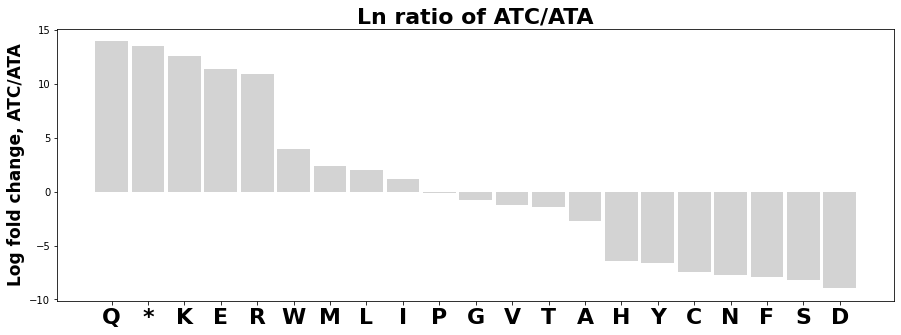

In [32]:
#display fold change
font=22
weight='semibold'
dataset=[]
labels=[]
ratioDataDF=ratioDataDF.sort_values(by='Ratio', ascending=False)
for index,data in ratioDataDF.iterrows():
    dataset.append(math.log(data.Ratio))
    labels.append(data.AA)

ind=np.arange(len(dataset))



   # the x locations for the groups

fig, (ax1) = plt.subplots(1,1, sharex=True)
width = 0.9      # the width of the bars: can also be len(x) sequence
fig.set_size_inches(15, 5)
p1 = ax1.bar(ind, dataset, width, color='lightgrey')


ax1.set_title('Ln ratio of ATC/ATA',fontsize=font, fontweight=weight)

ax1.set_ylabel('Log fold change, ATC/ATA',fontsize=font-5, fontweight=weight)

plt.xticks(ind, labels, fontsize=font, fontweight=weight)

plt.show()

In [41]:
fig.savefig("SubstProfile-ATC-ATA-NoBiasBias-logchange.pdf",format='pdf')

# All code below is legacy and early attemps/designs for this plot

86.6025403784
182.574185835
50.0
213.200716356
54.7722557505
94.4911182523
195.940953205
94.4911182523
83.5495031734
200.445931434


<function matplotlib.pyplot.show>

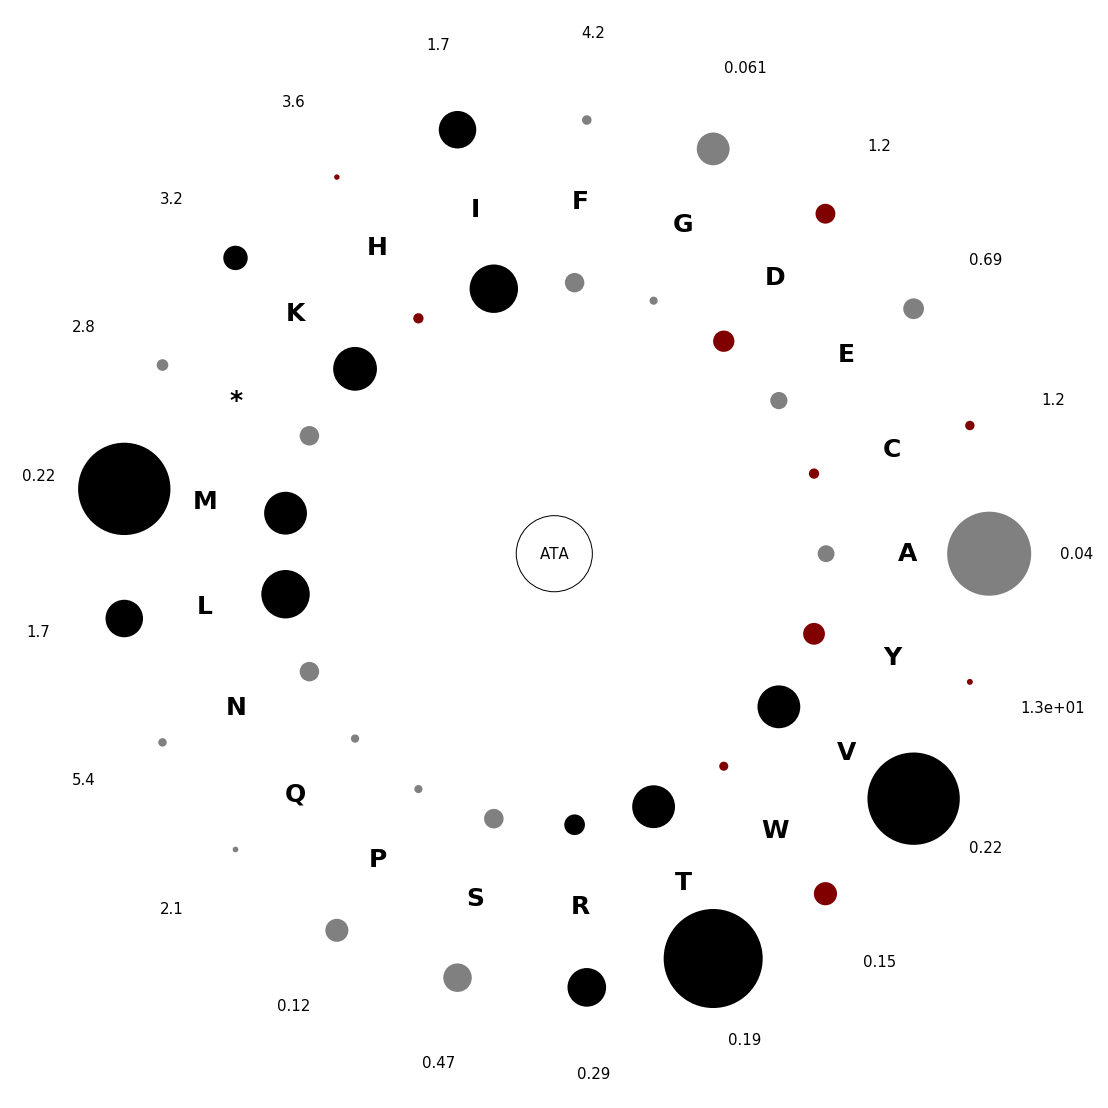

In [33]:
from matplotlib.patches import Circle
font=22
weight='semibold'
maxR=0.005
maxA=maxR**2*np.pi
edgecolor=None
facecolor='black'

fig,ax= plt.subplots(1, 1, figsize=(20,20))
ax.set_xlim(-10000,10000)
ax.set_ylim(-10000,10000)

c = Circle((0,0), radius=700,
    edgecolor="black", facecolor="white")     

ax.add_patch(c)
ax.annotate('ATA', xy=(0,0), fontsize=15, ha="center",va="center",color="black")

points1=len(dataATA1)
counter=0
for i in dataATA1:
    #print (dataAA[i]/mindataAA)*maxA
    angleincre=(2*np.pi)/points1

    dia=8000
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio(dataATA1[i]/mindataATA1,maxA)
    #print rad
    if rad<20 and rad > 0.1:
        rad=rad*60
        facecolor='grey'
        edgecolor='None'
    elif rad<0.1:
        rad=rad*10**4
        print rad
        facecolor='maroon'
        edgecolor='None'
    else:
        edgecolor=None
        facecolor='black'
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    #labelcoords=circleCoords(dia+1500,angleincre*counter)
    #ax.annotate(i, xy=labelcoords, fontsize=25, ha="center",va="center",color="black",weight = 'bold')
    counter+=1
    
    
counter=0
    
for i in dataATA2:
    #print (dataAA[i]/mindataAA)*maxA
    angleincre=(2*np.pi)/points1

    dia=5000
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio(dataATA2[i]/mindataATA1,maxA)
    #print rad
    if rad<20 and rad > 0.1:
        rad=rad*60
        facecolor='grey'
        edgecolor='None'
    elif rad<0.1:
        rad=rad*10**4
        print rad
        facecolor='maroon'
        edgecolor='None'
    else:
        edgecolor=None
        facecolor='black'
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    labelcoords=circleCoords(dia+1500,angleincre*counter)
    ax.annotate(i, xy=labelcoords, fontsize=25, ha="center",va="center",color="black",weight = 'bold')
    
    labelcoordsratio=circleCoords(dia+4600,angleincre*counter)
    ratio=dataATA2[i]/dataATA1[i]
    
    if ratio>100:
        
        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
        
    elif ratio<0.01:
        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
    elif ratio==1.0:
        ax.annotate(ratio, xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
    else:
        ax.annotate('{:.2}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
    counter+=1    


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])


ax.set_aspect('equal')

    
plt.show

In [34]:
fig.savefig("MutAccess_ATA_MutRate1-MutRate2-2.pdf",format='pdf')

In [34]:
dataAA={}
for i,row in data.iterrows():
    dataAA[CommonMotifProb.translateRNA(row.codon)]=0.0
for i,row in data.iterrows():
    dataAA[CommonMotifProb.translateRNA(row.codon)]+=row.probability

mindataAA=1
for i in dataAA:
    if dataAA[i]<mindataAA:
        mindataAA=dataAA[i]

AttributeError: 'Series' object has no attribute 'iterrows'

129.774364925
46.0396165263
35.5401735278
20.0


<function matplotlib.pyplot.show>

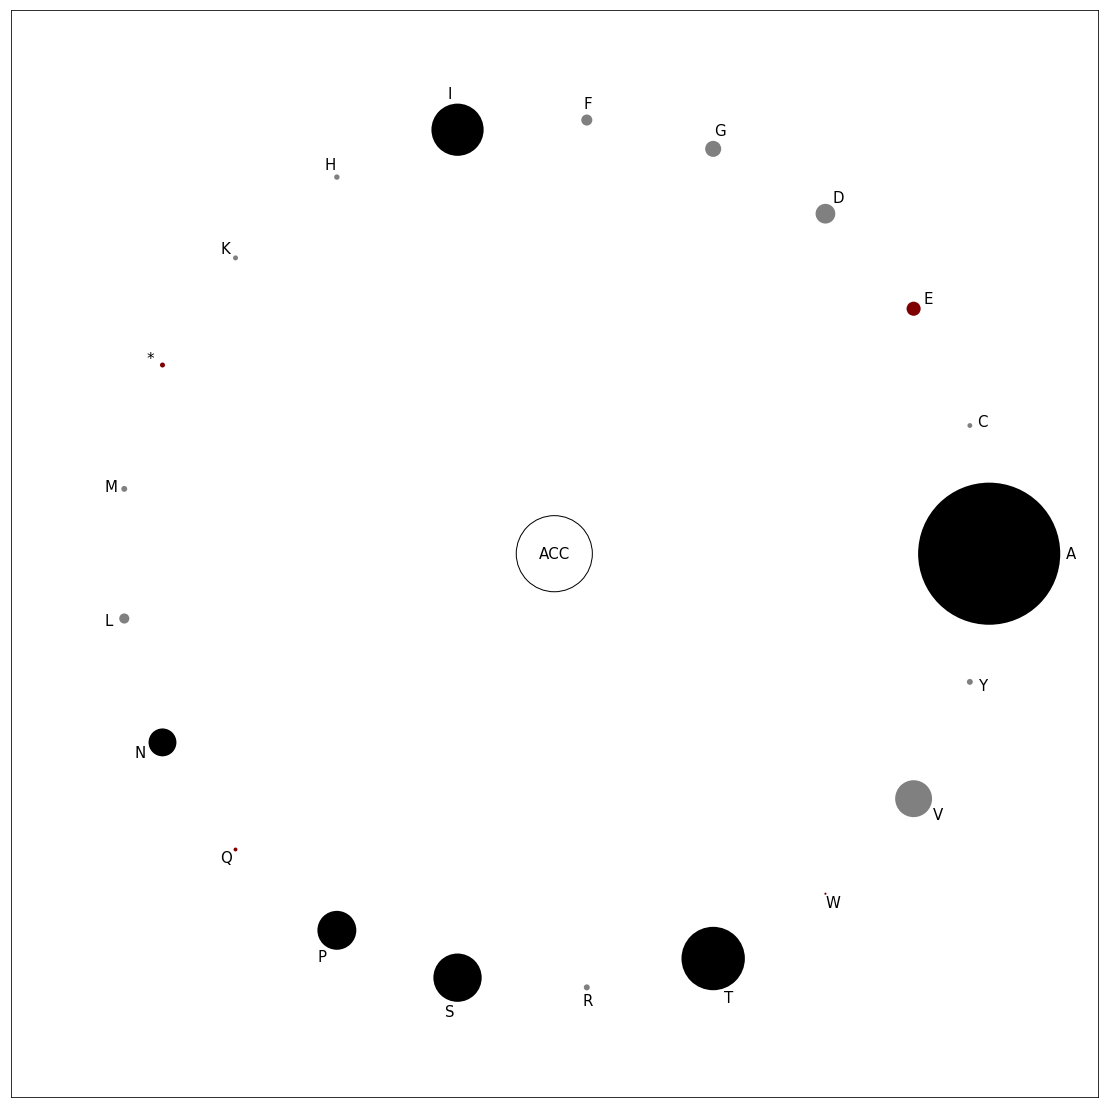

In [201]:
from matplotlib.patches import Circle
font=22
weight='semibold'
maxR=0.002
maxA=maxR**2*np.pi
edgecolor=None
facecolor='black'

fig,ax= plt.subplots(1, 1, figsize=(20,20))
ax.set_xlim(-10000,10000)
ax.set_ylim(-10000,10000)

c = Circle((0,0), radius=700,
    edgecolor="black", facecolor="white")     

ax.add_patch(c)
ax.annotate('ACC', xy=(0,0), fontsize=15, ha="center",va="center",color="black")

points1=len(dataAA)
counter=0
for i in dataAA:
    #print (dataAA[i]/mindataAA)*maxA
    angleincre=(2*np.pi)/points1

    dia=8000
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio(dataAA[i]/mindataAA,maxA)
    #print rad
    if rad<100 and rad > 0.1:
        rad=rad*50
        facecolor='grey'
        edgecolor='None'
    elif rad<0.1:
        rad=rad*10**4
        print rad
        facecolor='maroon'
        edgecolor='None'
    else:
        edgecolor=None
        facecolor='black'
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    labelcoords=circleCoords(dia+rad+200,angleincre*counter)
    ax.annotate(i, xy=labelcoords, fontsize=15, ha="center",va="center",color="black")
    counter+=1
    


#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])


ax.set_aspect('equal')

    
plt.show

In [113]:
data1=data[data["probability"]>5.399785e-08]
minValue=0.000005
labels=[]
arearatios=[]
for i,row in data1.iterrows():
    labels.append(row.codon+" \n"+CommonMotifProb.translateRNA(row.codon))
    arearatios.append(row.probability/minValue)

In [171]:

data2=data[(data["probability"]<5.399785e-08) & (data["probability"]>5.399785e-12)]
minValue=2.600394e-11
labels2=[]
arearatios2=[]
for i,row in data2.iterrows():
    labels2.append(row.codon+"\n "+CommonMotifProb.translateRNA(row.codon)+' ')
    arearatios2.append(row.probability/minValue)

   codon   probability
9    GTC  5.399785e-09
10   GCT  5.399785e-09
11   GCA  1.539939e-09
12   GAC  1.539939e-09
13   GGC  1.019959e-09
14   GCG  1.019959e-09
15   ATT  7.288301e-10
16   TTC  4.859807e-10
17   TCT  4.859807e-10
18   CTC  4.049839e-10
19   CCT  4.049839e-10
20   ATA  2.078516e-10
21   AAT  2.078516e-10
22   TAC  1.385945e-10
23   TCA  1.385945e-10
24   ATG  1.376679e-10
25   AGT  1.376679e-10
26   CCA  1.154954e-10
27   CAC  1.154954e-10
28   TGC  9.179635e-11
29   TCG  9.179635e-11
30   CCG  7.649696e-11
31   CGC  7.649696e-11
32   AAA  5.927619e-11
33   AAG  3.926085e-11
34   AGA  3.926085e-11
35   AGG  2.600394e-11


<function matplotlib.pyplot.show>

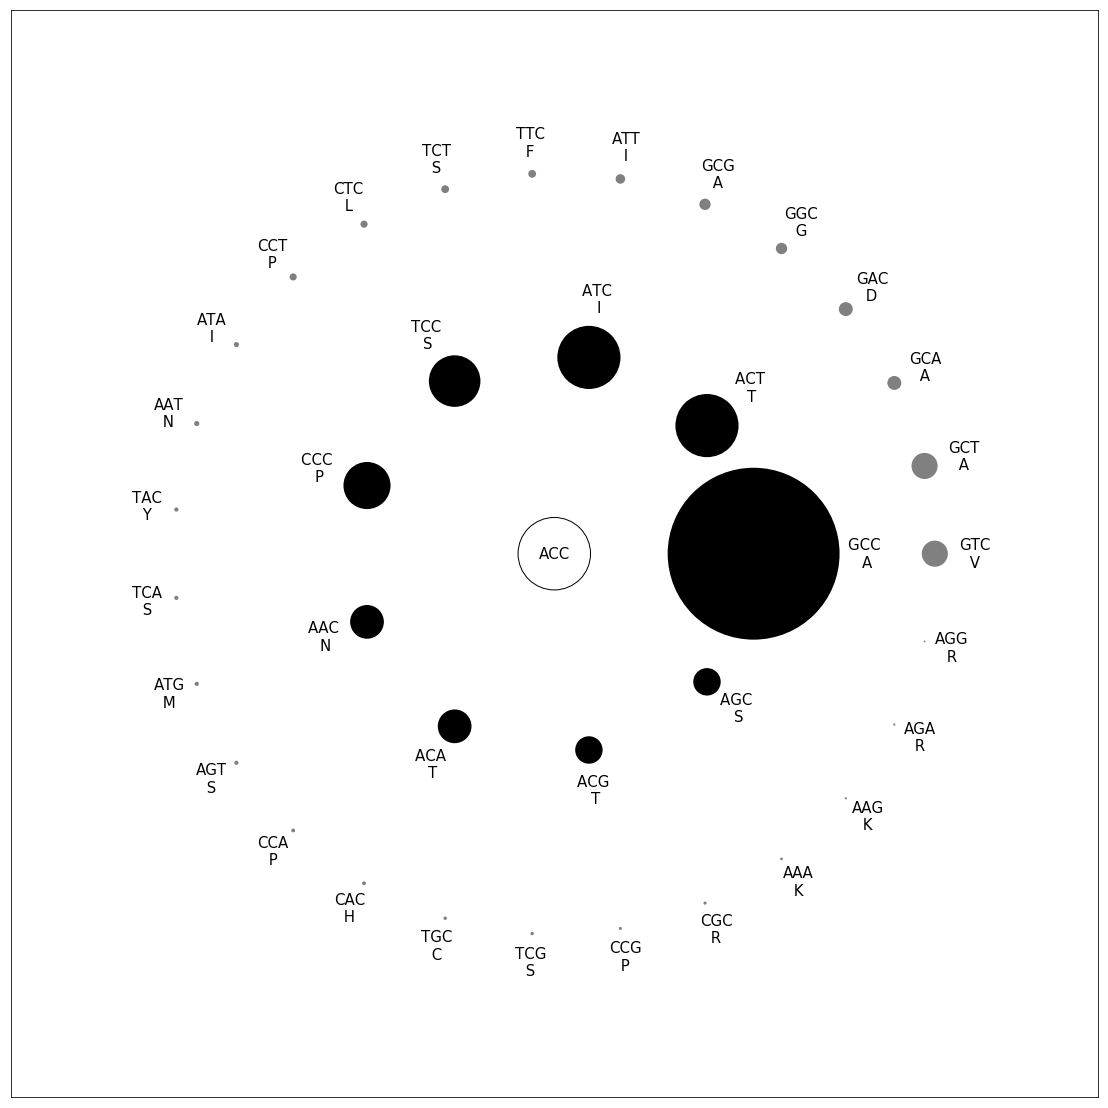

In [179]:
from matplotlib.patches import Circle
font=22
weight='semibold'
maxR=75.0
maxA=maxR**2*np.pi

maxR2=5.0
maxA2=maxR2**2*np.pi
j=0
fig,ax= plt.subplots(1, 1, figsize=(20,20))
ax.set_xlim(-3000,3000)
ax.set_ylim(-3000,3000)

c = Circle((0,0), radius=200,
    edgecolor="black", facecolor="white")     

ax.add_patch(c)
ax.annotate('ACC', xy=(0,0), fontsize=15, ha="center",va="center",color="black")

points1=9
points2=27
for i in range(points1):
    
    angleincre=(2*np.pi)/points1

    dia=1100
    
    coords=circleCoords(dia,angleincre*i)

    rad=circleAratio(arearatios[i],maxA)
    
    c = Circle(coords, radius=rad,
    edgecolor=None, facecolor='black')     
    ax.add_patch(c)
    labelcoords=circleCoords(dia+rad+150,angleincre*i)
    ax.annotate(labels[i], xy=labelcoords, fontsize=15, ha="center",va="center",color="black")

    
for i in range(points2):
    
    angleincre=(2*np.pi)/points2

    dia=2100
    
    coords=circleCoords(dia,angleincre*i)

    rad=circleAratio(arearatios2[i],maxA2)
    
    c = Circle(coords, radius=rad,
    edgecolor=None, facecolor='grey')     
    ax.add_patch(c)
    labelcoords=circleCoords(dia+rad+150,angleincre*i)
    ax.annotate(labels2[i], xy=labelcoords, fontsize=15, ha="center",va="center",color="black")


#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])


ax.set_aspect('equal')

    
plt.show

<function matplotlib.pyplot.show>

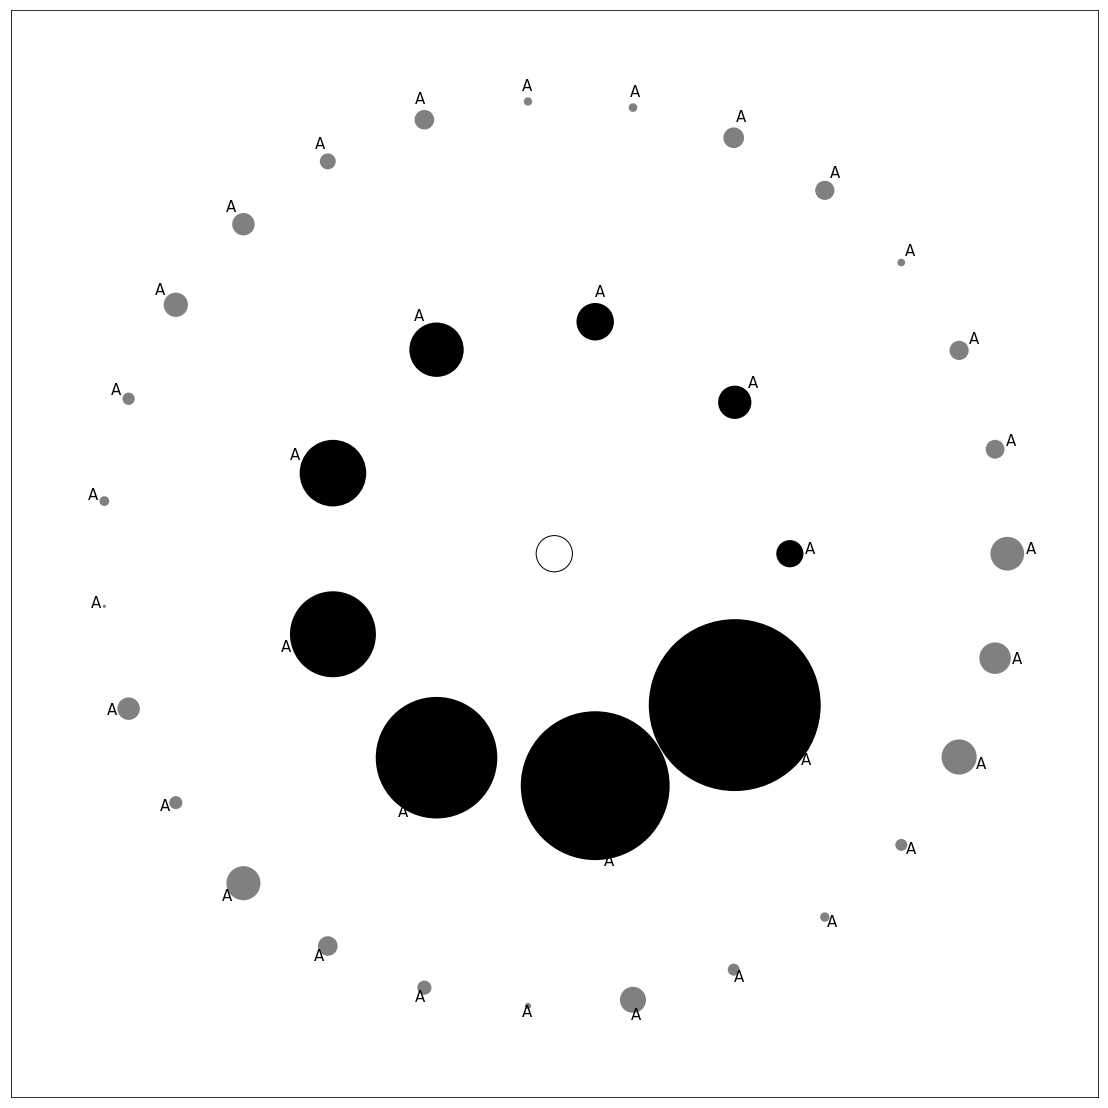

In [71]:
from matplotlib.patches import Circle
font=22
weight='semibold'
maxR=75.0
maxA=maxR**2*np.pi
j=0
fig,ax= plt.subplots(1, 1, figsize=(20,20))
ax.set_xlim(-3000,3000)
ax.set_ylim(-3000,3000)

c = Circle((0,0), radius=100,
    edgecolor="black", facecolor="white")     

ax.add_patch(c)
arearatios=[1,1.5,1.9,4,6,10,20,30, 40]
points1=9
points2=27
for i in range(points1):
    
    angleincre=(2*np.pi)/points1

    dia=1300
    
    coords=circleCoords(dia,angleincre*i)

    rad=circleAratio(arearatios[i],maxA)
    
    c = Circle(coords, radius=rad,
    edgecolor=None, facecolor='black')     
    ax.add_patch(c)
    labelcoords=circleCoords(dia+rad+1.1*35,angleincre*i)
    ax.annotate("A", xy=labelcoords, fontsize=15, ha="center",color="black")
for i in range(points2):
    
    angleincre=(2*np.pi)/points2
    dia=2500
    coords=circleCoords(dia,angleincre*i)
    
    rad=random.randint(1,100)
    labelcoords=circleCoords(dia+rad+1.1*35,angleincre*i)
    c = Circle(coords, radius=rad,
    edgecolor=None, facecolor='gray')     
    ax.add_patch(c)
    
    ax.annotate("A", xy=labelcoords, fontsize=15, ha="center",color="black")


#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])


ax.set_aspect('equal')

    
plt.show